In [ ]:
import numpy as np

data = np.load('C:\\Users\\ADMIN\\Desktop\\Miniproject\\Face Mask Detection\\new_data.npy')
target=np.load('C:\\Users\\ADMIN\\Desktop\\Miniproject\\Face Mask Detection\\new_target.npy')

#loading the save numpy arrays in the previous code


In [13]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [15]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
86/86 [==============================] - 454s 5s/step - loss: 0.6324 - accuracy: 0.6427 - val_loss: 0.5246 - val_accuracy: 0.7274
Epoch 2/20
86/86 [==============================] - 1071s 12s/step - loss: 0.4719 - accuracy: 0.7773 - val_loss: 0.4030 - val_accuracy: 0.8367
Epoch 3/20
86/86 [==============================] - 237s 3s/step - loss: 0.3567 - accuracy: 0.8454 - val_loss: 0.3081 - val_accuracy: 0.8776
Epoch 4/20
86/86 [==============================] - 196s 2s/step - loss: 0.3126 - accuracy: 0.8669 - val_loss: 0.2902 - val_accuracy: 0.8761
Epoch 5/20
86/86 [==============================] - 186s 2s/step - loss: 0.2555 - accuracy: 0.8972 - val_loss: 0.3322 - val_accuracy: 0.8542
Epoch 6/20
86/86 [==============================] - 1162s 14s/step - loss: 0.2487 - accuracy: 0.8972 - val_loss: 0.2488 - val_accuracy: 0.9096
Epoch 7/20
86/86 [==============================] - 285s 3s/step - loss: 0.2061 - accuracy: 0.9151 - val_loss: 0.2602 - val_accuracy: 0.8950
Epoch 8/2

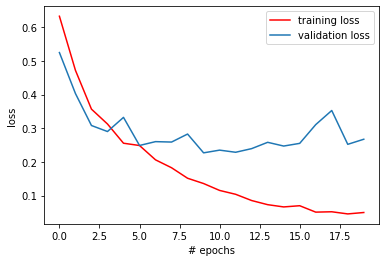

In [16]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [1]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

In [18]:
print(model.evaluate(test_data,test_target))

12/12 [==============================] - 11s 869ms/step - loss: 0.3416 - accuracy: 0.8950
[0.3416324853897095, 0.8950130939483643]


In [19]:
model.save('My_model')

INFO:tensorflow:Assets written to: My_model\assets
